In [1]:
import cPickle as pickle
import scipy.interpolate as interp
sys.path.append('../src')
import Analyzer
import Grapher
import Munger
import PAD
import Plasma_Plotter
import Scraper

In [2]:
def calc_mec_to_tknot(tknot,mec_munge,frame):
    if frame == 'gse':
        mec_interp_x = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gse_pos'][:,0])
        mec_interp_y = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gse_pos'][:,1])
        mec_interp_z = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gse_pos'][:,2])
    if frame == 'gsm':
        mec_interp_x = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gsm_pos'][:,0])
        mec_interp_y = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gsm_pos'][:,1])
        mec_interp_z = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gsm_pos'][:,2])
        
    Re = 6378.14
    
    xknot = mec_interp_x(tknot)/Re
    yknot = mec_interp_y(tknot)/Re
    zknot = mec_interp_z(tknot)/Re
    
    return [xknot,yknot,zknot]
    

# Import the project-specific files

In [3]:
obs = 'mms1'
obs_files = pickle.load(open('c:/Users/cschiff/Documents/github/Stormtime_MPause_12_21_2015.data_local','r')) 
m1f = obs_files[obs]

# Create the munges

In [5]:
dce_munge   = Munger.make_munge_via_translation(obs,'dce',Munger.dce_delta,m1f['dce_b'],Munger.dce_translation)
fgm_munge   = Munger.make_munge_via_translation(obs,'fgm',Munger.fgm_delta,m1f['fgm_b'],Munger.fgm_translation) 
emoms_munge = Munger.make_munge_via_translation(obs,'emoms',Munger.des_delta,m1f['emoms_b'],Munger.emoms_translation)
imoms_munge = Munger.make_munge_via_translation(obs,'imoms',Munger.dis_delta,m1f['imoms_b'],Munger.imoms_translation)
edist_munge = Munger.make_munge_via_translation(obs,'edist',Munger.des_delta,m1f['edist_b'],Munger.edist_translation)
idist_munge = Munger.make_munge_via_translation(obs,'idist',Munger.dis_delta,m1f['idist_b'],Munger.idist_translation)
bpsd_munge  = Munger.make_munge_via_translation(obs,'bpsd',0,m1f['bpsd_f'],Munger.bpsd_translation)
epsd_munge  = Munger.make_munge_via_translation(obs,'epsd',0,m1f['epsd_f'],Munger.epsd_translation)
mec_munge   = Munger.make_munge_via_translation(obs,'mec',0,m1f['mec_s'],Munger.mec_translation)
scpot_munge = Munger.make_munge_via_translation(obs,'scpot',0,m1f['scpot_f'],Munger.scpot_translation)

segment 1 - start: 2015-12-21 10:27:54.078383 stop 2015-12-21 10:30:40.018073
fresh segment - first stride
segment 2 - start: 2015-12-21 10:30:34.002486 stop 2015-12-21 10:32:34.004037
overlap detected - dealing with it
segment 3 - start: 2015-12-21 10:32:34.004159 stop 2015-12-21 10:35:03.967064
adjacency underway
segment 4 - start: 2015-12-21 10:45:54.093437 stop 2015-12-21 10:48:53.978636
break in adjacency - new stride
Munged 2 series for dce on mms1!
segment 1 - start: 2015-12-21 10:27:54.389778 stop 2015-12-21 10:30:40.384279
fresh segment - first stride
segment 2 - start: 2015-12-21 10:30:34.392007 stop 2015-12-21 10:32:34.385868
overlap detected - dealing with it
segment 3 - start: 2015-12-21 10:32:34.393679 stop 2015-12-21 10:35:03.387944
adjacency underway
segment 4 - start: 2015-12-21 10:45:54.404831 stop 2015-12-21 10:48:53.399516
break in adjacency - new stride
Munged 2 series for fgm on mms1!
segment 1 - start: 2015-12-21 10:27:54.071992 stop 2015-12-21 10:30:39.973270
fr

# Adapt Select Munges and check interpolation

In [6]:
efgm_munge = Munger.adapt_munge_to_munge(fgm_munge,emoms_munge)

fgm flavored
fgm flavored


(735953.4410104167, 735953.4410127315)

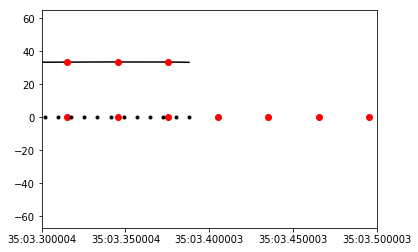

In [7]:
comp = 1
eQ = np.zeros(emoms_munge[0]['epochs'].shape)
fQ = np.zeros(fgm_munge[0]['epochs'].shape)
plt.plot(emoms_munge[0]['epochs'],eQ,'ro')
plt.plot(fgm_munge[0]['epochs'],fQ,'k.')
plt.plot(fgm_munge[0]['epochs'],fgm_munge[0]['Bbcs'][:,comp],'k-')
plt.plot(efgm_munge[0]['epochs'],efgm_munge[0]['Bbcs'][:,comp],'ro')
time_step = dt.timedelta(microseconds=200000)
#n = 645  #random (maybe) point in the middle
#n = 0     #start of the series
n = 2145  #end of the series
plt.xlim([dt.datetime(2015,12,21,10,27,54,300000)+n*time_step,dt.datetime(2015,12,21,10,27,54,500000)+n*time_step])

In [8]:
iemoms_munge = Munger.adapt_munge_to_munge(emoms_munge,imoms_munge)

moms flavored
moms flavored


(735953.4410104167, 735953.4410127315)

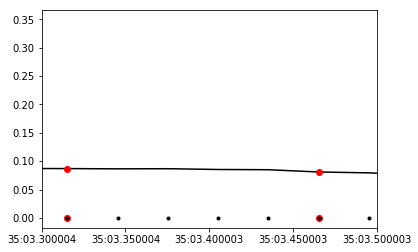

In [9]:
comp0 = 0
comp1 = 0
eQ = np.zeros(emoms_munge[0]['epochs'].shape)
iQ = np.zeros(imoms_munge[0]['epochs'].shape)
plt.plot(imoms_munge[0]['epochs'],iQ,'ro')
plt.plot(emoms_munge[0]['epochs'],eQ,'k.')
plt.plot(emoms_munge[0]['epochs'],emoms_munge[0]['pres_s'][:,comp0,comp1],'k-')
plt.plot(iemoms_munge[0]['epochs'],iemoms_munge[0]['pres_s'][:,comp0,comp1],'ro')
time_step = dt.timedelta(microseconds=200000)
#n = 645  #random (maybe) point in the middle
#n = 0     #start of the series
n = 2145  #end of the series
plt.xlim([dt.datetime(2015,12,21,10,27,54,300000)+n*time_step,dt.datetime(2015,12,21,10,27,54,500000)+n*time_step])

In [10]:
edce_munge = Munger.adapt_munge_to_munge(dce_munge,emoms_munge)

dce flavored
dce flavored


(-5, 5)

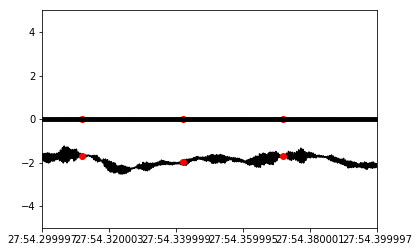

In [11]:
comp = 0
dQ = np.zeros(dce_munge[0]['epochs'].shape)
plt.plot(emoms_munge[0]['epochs'],eQ,'ro')
plt.plot(dce_munge[0]['epochs'],dQ,'k.')
plt.plot(dce_munge[0]['epochs'],dce_munge[0]['Egse'][:,comp],'k-')
plt.plot(edce_munge[0]['epochs'],edce_munge[0]['Egse'][:,comp],'ro')
time_step = dt.timedelta(microseconds=60000)
#n = 645  #random (maybe) point in the middle
#n = 0     #start of the series
n = 0  #end of the series
plt.xlim([dt.datetime(2015,12,21,10,27,54,300000)+n*time_step,dt.datetime(2015,12,21,10,27,54,400000)+n*time_step])
plt.ylim([-5,5])

# Create appropriate figures

In [12]:
#specify the time
t_anchor = dt.datetime(2015,12,21,10,27,0)
t_window = dt.timedelta(minutes=10.0)
t_step   = dt.timedelta(minutes=2.0) 
n        = 0
t_start  = t_anchor+n*t_step 
t_stop   = t_start+t_window

../src\Plasma_Plotter.py:307: RuntimeWarning: divide by zero encountered in log10
  s1 = np.ma.masked_invalid(np.log10(smoms_munge[0]['omnis'])).T
../src\Plasma_Plotter.py:313: RuntimeWarning: divide by zero encountered in log10
  sj = np.ma.masked_invalid(np.log10(smoms_munge[j]['omnis'])).T
../src\Plasma_Plotter.py:370: RuntimeWarning: divide by zero encountered in log10
  s1 = np.ma.masked_invalid(np.log10(psd_munge[0][field])).T


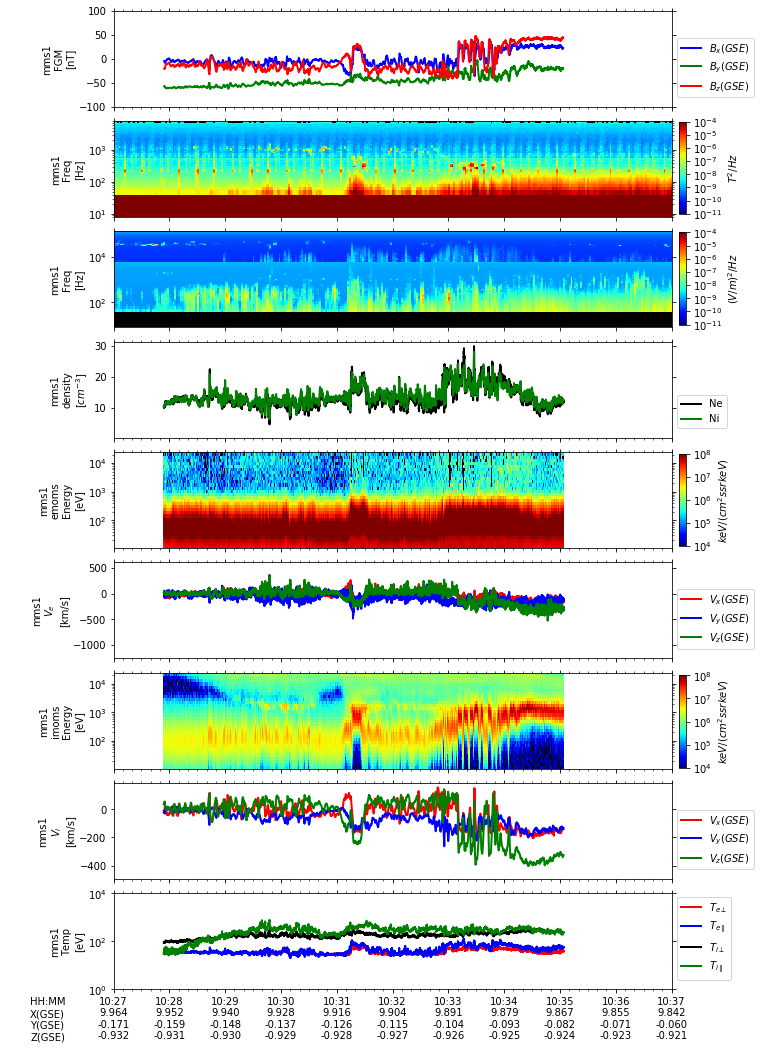

In [13]:
num_rows = 9
num_cols = 1
#create the figure
fig = plt.figure(figsize=(10,2*num_rows))
ax_Bvec  = fig.add_subplot(num_rows,num_cols,1)
ax_DES   = fig.add_subplot(num_rows,num_cols,5)
ax_DIS   = fig.add_subplot(num_rows,num_cols,7)
ax_Den   = fig.add_subplot(num_rows,num_cols,4)
ax_Ve    = fig.add_subplot(num_rows,num_cols,6)
ax_Vi    = fig.add_subplot(num_rows,num_cols,8)
ax_T     = fig.add_subplot(num_rows,num_cols,9)
ax_BPSD  = fig.add_subplot(num_rows,num_cols,2)
ax_EPSD  = fig.add_subplot(num_rows,num_cols,3)

#load the panels
Bvec = Plasma_Plotter.make_Bvector_panel(ax_Bvec,obs,fgm_munge)
DES  = Plasma_Plotter.make_Et_panel(fig,ax_DES,obs,emoms_munge,'emoms',0)
DIS  = Plasma_Plotter.make_Et_panel(fig,ax_DIS,obs,imoms_munge,'imoms',0)
Den  = Plasma_Plotter.make_density_panel(ax_Den,obs,emoms_munge,imoms_munge)
Ve   = Plasma_Plotter.make_sVvector_panel(ax_Ve,obs,emoms_munge,'emoms')
Vi   = Plasma_Plotter.make_sVvector_panel(ax_Vi,obs,imoms_munge,'imoms')
T    = Plasma_Plotter.make_temperature_panel(ax_T,obs,emoms_munge,imoms_munge)
BPSD = Plasma_Plotter.make_psd_panel(fig,ax_BPSD,obs,bpsd_munge,'bpsd')
EPSD = Plasma_Plotter.make_psd_panel(fig,ax_EPSD,obs,epsd_munge,'epsd')

#set the time formatting
t_major_parms = {'loc':mdates.MinuteLocator,'by':range(0,60,1),  'int':1,'form':'%H:%M'}
t_minor_parms = {'loc':mdates.SecondLocator,'by':range(0,60,10),'int':1,'form':''}

#customize the axes
#set the tick locations
Bvec.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
DES.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
DIS.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Den.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Ve.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Vi.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
T.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')

ax_Bvec.set_xticklabels([])
ax_DES.set_xticklabels([])
ax_DIS.set_xticklabels([])
ax_Den.set_xticklabels([])
ax_Ve.set_xticklabels([])
ax_Vi.set_xticklabels([])
#ax_T.set_xticklabels([])
ax_BPSD.set_xticklabels([])
ax_EPSD.set_xticklabels([])

Bvec.customize_ax({'ylim':[-100,100]})
#Ve.customize_ax({'ylim':[-400,200]})
Den.customize_ax({'yscale':'linear'})

ax_Bvec.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_DES.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_DIS.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Den.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Ve.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Vi.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_T.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_BPSD.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_EPSD.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])



ax_Bvec.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_DES.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_DIS.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Den.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Ve.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Vi.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_T.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_BPSD.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_EPSD.tick_params(which='both',bottom=True,top=True,left=True,right=True)

Grapher.add_info_box(fig,(0.009,0.086,0.04,0.04),'HH:MM\nX(GSE)\nY(GSE)\nZ(GSE)',border='off')

fig.canvas.draw_idle()


tknots = ax_T.get_xticks()
ax_BPSD.set_xticks(tknots)
ax_EPSD.set_xticks(tknots)
tlabs  = ax_T.get_xticklabels()
counter = 0
for item in tlabs:
    pos        = calc_mec_to_tknot(tknots[counter],mec_munge,'gse')
    decoration = '\n'+'{0:.3f}\n{1:.3f}\n{2:.3f}'.format(pos[0],pos[1],pos[2])
    tlabs[counter].set_text(item.get_text()+decoration)
    counter += 1
ax_T.set_xticklabels(tlabs)
 

plt.subplots_adjust(hspace=0.15)

ax_Bvec.legend(loc=(1.01,0.1))
ax_Den.legend(loc=(1.01,0.1))
ax_Ve.legend(loc=(1.01,0.1))
ax_Vi.legend(loc=(1.01,0.1))
ax_T.legend(loc=(1.01,0.1))

In [14]:
def calculate_MSA(fgm_munge):
    num_strides = len(fgm_munge)
    mag = lambda x:np.sqrt(x.dot(x))
    
    for N in range(num_strides):
        B       = fgm_munge[N]['Bgse']
        num_pts = len(B)
        MSA = np.nan*np.zeros(num_pts)
        MSA[1:] = [ np.arccos(B[i,:].dot(B[0,:])/(mag(B[i,:])*mag(B[0,:])))\
                    for i in range(1,num_pts)]
        fgm_munge[N]['MSA'] = MSA*180.0/np.pi

In [15]:
calculate_MSA(fgm_munge)

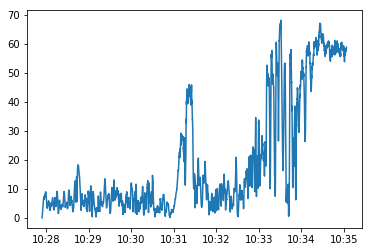

In [16]:
#set the time formatting
t_major_parms = {'loc':mdates.MinuteLocator,'by':range(0,60,1),  'int':1,'form':'%H:%M'}
t_minor_parms = {'loc':mdates.SecondLocator,'by':range(0,60,10),'int':1,'form':''}

fig_MSA = plt.figure()
ax_MSA  = fig_MSA.add_subplot(1,1,1)
ax_MSA.plot(fgm_munge[0]['epochs'],fgm_munge[0]['MSA'])
ax_MSA.xaxis.set_major_locator(mdates.MinuteLocator(byminute=range(0,60,1),interval=1))
ax_MSA.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

In [17]:
def calculate_VSA(smoms_munge):
    num_strides = len(smoms_munge)
    mag = lambda x:np.sqrt(x.dot(x))
    
    for N in range(num_strides):
        V0      = smoms_munge[N]['bulk_vs'][0,:]
        V       = smoms_munge[N]['bulk_vs']
        num_pts = len(smoms_gse)
        VSA     = np.nan*np.zeros(num_pts)
        VSA     = np.arccos(V.dot(V0)/(mag(V)*mag(V0)))
        smoms_munge[N]['VSA'] = VSA*180.0/np.pi

In [18]:
Analyzer.make_record_varying(edist_munge,'thetas')
Analyzer.calculate_incoming_particle_directions(edist_munge)
Analyzer.calculate_pitch_angles(fgm_munge,edist_munge)

fgm flavored
fgm flavored


In [19]:
edist_munge[0]['dist'][47,21,6,5]

2.003705e-26

In [20]:
def calculate_omni_number_flux(sdist_munge):
    #determine the number of strides
    num_strides = len(sdist_munge)
    
    for N in range(num_strides):
        omni_jn = np.average(np.average(sdist_munge[N]['jn'],axis=1),axis=1)/(4.0*np.pi)
        sdist_munge[N]['omni_jn'] = omni_jn

In [22]:
Analyzer.calculate_omni_number_flux(edist_munge)

AttributeError: 'module' object has no attribute 'calculate_omni_number_flux'

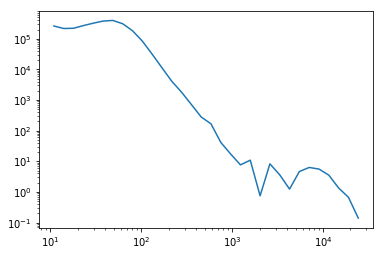

In [81]:
plt.loglog(edist_munge[0]['ergs'][0,:],edist_munge[0]['omni_jn'][0,:])

In [174]:
def compute_limited_PAD(mode,time_label,minE,maxE,minPA,maxPA,core_data):
    #find the truncated energy range
    Edata                     = core_data['parms']['Erg'][minE:maxE]
    
    #get the pitch angles and then flatten to a 1-D array
    pitch_angles              = compute_pitch_angles(mode,core_data['v_dirs'],core_data['bfield'],time_label)
    flat_PA                   = np.ndarray.flatten(pitch_angles)
    
    sub_PAD                   = np.zeros(len(range(minE,maxE)))
    counter                   = 0
    for energy_label in range(minE,maxE):
        local_jN              = np.ndarray.flatten(core_data['jN'][time_label,:,:,energy_label])
        PA_table              = np.array(zip(flat_PA,local_jN))
        PA_range              = np.where( (flat_PA > minPA) & (flat_PA < maxPA))
        sub_PAD[counter]      = np.sum(PA_table[PA_range][:,1])
        counter              += 1        
    
    sterads    = spherical_cap_area(maxPA) - spherical_cap_area(minPA)        
    return Edata, sub_PAD/sterads


In [76]:
def compute_number_flux(sdist_munge):
    m_e    = 9.10938356e-31  #mass of electron in Kg
    eV     = 1.60218e-19     #energy of 1 electron-volt in Joules
    N      = 0
    E      = sdist_munge[N]['ergs'][0,:]
    coeff  = 2.0*(E*eV/m_e)**2/E *100.0**4 #100**2 for m -> cm
    print coeff
    jN     = np.zeros(sdist_munge[N]['dist'].shape)
    counter = 0
    for c in coeff:
        jN[:,:,:,counter] = c * sdist_munge[N]['dist'][:,:,:,counter]
        counter           = counter + 1
        
    #jN     = coeff*FS_dist['Dist'] - don't know why this ever worked
    return jN  

In [65]:
print edist_munge[0]['dist'][47,21,6,4]
print edist_munge[0]['jn'][47,21,6,4]

3.28655e-26
6819873.5


In [77]:
jN = compute_number_flux(edist_munge)

[  6.78086589e+31   8.69262540e+31   1.11488319e+32   1.42917876e+32
   1.83256635e+32   2.34979260e+32   3.01303116e+32   3.86373311e+32
   4.95386775e+32   6.35211329e+32   8.14508220e+32   1.04441419e+33
   1.33915928e+33   1.71711847e+33   2.20173996e+33   2.82309224e+33
   3.61990596e+33   4.64155188e+33   5.95150939e+33   7.63119657e+33
   9.78498756e+33   1.25465830e+34   1.60876065e+34   2.06280028e+34
   2.64498318e+34   3.39147266e+34   4.34865112e+34   5.57596914e+34
   7.14966724e+34   9.16751940e+34   1.17548656e+35   1.50724419e+35]


ValueError: x and y can be no greater than 2-D, but have shapes (32L,) and (32L, 16L, 32L)

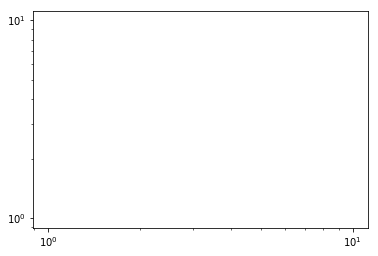

In [82]:
plt.loglog(edist_munge[0]['ergs'][0,:],jN[0,:])

In [68]:
np.max(np.abs(jN - edist_munge[0]['jn']))

5012964.0

In [39]:
edist_munge[0]['dist'].shape

(14330L, 32L, 16L, 32L)

In [48]:
time_label = 130
energy_label = 3
omni_jN = np.average(np.average(jN[time_label,:,:,:],axis=0),axis=0)/(4.0*np.pi)

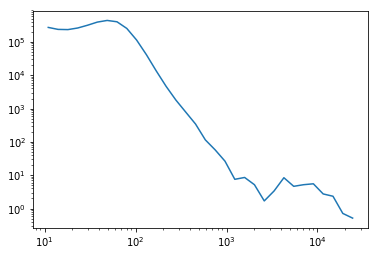

In [85]:
plt.loglog(edist_munge[0]['ergs'][time_label,:],omni_jN)

In [74]:
Analyzer.calculate_differential_number_flux(edist_munge,'emoms')

[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208

   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153

[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863

[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173

   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148

[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978

[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548

[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440

[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978

[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116

[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917

[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494

[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173

[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548

[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748

   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440

[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258

[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487

[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440

[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145

   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301

[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494

   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504

[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440

[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279

[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863

[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875

[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497

[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145

[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173

[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548

[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258

[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258

   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384

   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153

[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748

   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465

[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301

   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494

[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148

[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963

[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594

[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915

   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173

   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308

[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145

[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116

[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963

   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153

[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497

[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504

[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208

[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208

[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594

[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989

[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989

   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279

[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594

   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594

[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915

[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978

   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748

[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371

   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978

[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748

   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748

   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594

[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301

[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875

   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301

[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497

[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978

   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384

[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384

[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594

[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863

   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255

[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258

   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083

   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255

   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384

   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371

[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153

[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917

   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494

[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487

[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915

[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875

[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308

[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594

[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963

   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301

   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371

[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487

[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440

   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863

[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208

[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279

[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494

[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301

[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083

   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963

   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255

[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   9.84335159e+31
   8.69258864e+31   9.84335159e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.26212678e+32
   1.11487864e+32   1.26212678e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.61849200e+32
   1.42917295e+32   1.61849200e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   2.07508500e+32
   1.83255862e+32   2.07508500e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.66098384e+32
   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504

[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279

[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494

   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173067e+33   2.49313340e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   3.19676908e+33
   2.82308048e+33   3.19676908e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148

[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.84033610e+34
   3.39145855e+34   3.84033610e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.92420015e+34
   4.34863280e+34   4.92420015e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   6.31395026e+34
   5.57594587e+34   6.31395026e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   8.09593672e+34
   7.14963852e+34   8.09593672e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   1.03808561e+35
   9.16748276e+34   1.03808561e+35]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.33106423e+35
   1.17548171e+35   1.33106423e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.70673011e+35
   1.50723795e+35   1.70673011e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   7.67793769e+31
   6.78083784e+31   7.67793769e+31]
[  8.69258

[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   4.09900423e+33
   3.61989111e+33   4.09900423e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   5.25582980e+33
   4.64153269e+33   5.25582980e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   6.73920012e+33
   5.95148463e+33   6.73920012e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   8.64117553e+33
   7.63116439e+33   8.64117553e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   1.10799880e+34
   9.78494732e+33   1.10799880e+34]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.42070926e+34
   1.25465297e+34   1.42070926e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.82168200e+34
   1.60875384e+34   1.82168200e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.33581311e+34
   2.06279150e+34   2.33581311e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.99504539e+34
   2.64497229e+34   2.99504539e+34]
[  3.39145

   2.34978312e+32   2.66098384e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.41207301e+32
   3.01301839e+32   3.41207301e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   4.37475398e+32
   3.86371647e+32   4.37475398e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   5.60965836e+32
   4.95384763e+32   5.60965836e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   7.19288502e+32
   6.35208582e+32   7.19288502e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   9.22342468e+32
   8.14504815e+32   9.22342468e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.18262509e+33
   1.04440986e+33   1.18262509e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.51640815e+33
   1.33915355e+33   1.51640815e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.94435567e+33
   1.71711119e+33   1.94435567e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.49313340e+33
   2.20173

[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208

[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384

[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279

   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475

   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288

   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033

[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594

   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849

[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083

   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475

   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106

[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748

[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487

[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548

[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989

[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494

[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279

   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070

[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384

[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301

   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920

[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487

[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875

   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582

[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548

[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440

   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420

   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640

   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288

[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116

[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723

   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395

   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342

[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748

[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548

[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548

[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875

[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917

[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863

[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963

[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208

   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168

[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504

[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915

[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849200e+32   1.42917295e+32]
[  1.83255862e+32   2.07508500e+32   1.83255862e+32 ...,   1.83255862e+32
   2.07508500e+32   1.83255862e+32]
[  2.34978312e+32   2.66098384e+32   2.34978312e+32 ...,   2.34978312e+32
   2.66098384e+32   2.34978312e+32]
[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440

[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748

   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676

[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145855e+34   3.84033610e+34   3.39145855e+34 ...,   3.39145855e+34
   3.84033610e+34   3.39145855e+34]
[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594

   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676

[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465297e+34   1.42070926e+34   1.25465297e+34 ...,   1.25465297e+34
   1.42070926e+34   1.25465297e+34]
[  1.60875384e+34   1.82168200e+34   1.60875384e+34 ...,   1.60875384e+34
   1.82168200e+34   1.60875384e+34]
[  2.06279150e+34   2.33581311e+34   2.06279150e+34 ...,   2.06279150e+34
   2.33581311e+34   2.06279150e+34]
[  2.64497229e+34   2.99504539e+34   2.64497229e+34 ...,   2.64497229e+34
   2.99504539e+34   2.64497229e+34]
[  3.39145

[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116

[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917

   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917295e+32   1.61849200e+32   1.42917295e+32 ...,   1.42917295e+32
   1.61849

[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989

[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116439e+33   8.64117553e+33   7.63116439e+33 ...,   7.63116439e+33
   8.64117553e+33   7.63116439e+33]
[  9.78494732e+33   1.10799880e+34   9.78494732e+33 ...,   9.78494732e+33
   1.10799880e+34   9.78494732e+33]
[  1.25465

   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676

[  3.01301839e+32   3.41207301e+32   3.01301839e+32 ...,   3.01301839e+32
   3.41207301e+32   3.01301839e+32]
[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308

[  4.34863280e+34   4.92420015e+34   4.34863280e+34 ...,   4.34863280e+34
   4.92420015e+34   4.34863280e+34]
[  5.57594587e+34   6.31395026e+34   5.57594587e+34 ...,   5.57594587e+34
   6.31395026e+34   5.57594587e+34]
[  7.14963852e+34   8.09593672e+34   7.14963852e+34 ...,   7.14963852e+34
   8.09593672e+34   7.14963852e+34]
[  9.16748276e+34   1.03808561e+35   9.16748276e+34 ...,   9.16748276e+34
   1.03808561e+35   9.16748276e+34]
[  1.17548171e+35   1.33106423e+35   1.17548171e+35 ...,   1.17548171e+35
   1.33106423e+35   1.17548171e+35]
[  1.50723795e+35   1.70673011e+35   1.50723795e+35 ...,   1.50723795e+35
   1.70673011e+35   1.50723795e+35]
[  6.78083784e+31   7.67793769e+31   6.78083784e+31 ...,   6.78083784e+31
   7.67793769e+31   6.78083784e+31]
[  8.69258864e+31   9.84335159e+31   8.69258864e+31 ...,   8.69258864e+31
   9.84335159e+31   8.69258864e+31]
[  1.11487864e+32   1.26212678e+32   1.11487864e+32 ...,   1.11487864e+32
   1.26212678e+32   1.11487864e+32]
[  1.42917

[  3.86371647e+32   4.37475398e+32   3.86371647e+32 ...,   3.86371647e+32
   4.37475398e+32   3.86371647e+32]
[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989

[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153269e+33   5.25582980e+33   4.64153269e+33 ...,   4.64153269e+33
   5.25582980e+33   4.64153269e+33]
[  5.95148463e+33   6.73920012e+33   5.95148463e+33 ...,   5.95148463e+33
   6.73920012e+33   5.95148463e+33]
[  7.63116

[  4.95384763e+32   5.60965836e+32   4.95384763e+32 ...,   4.95384763e+32
   5.60965836e+32   4.95384763e+32]
[  6.35208582e+32   7.19288502e+32   6.35208582e+32 ...,   6.35208582e+32
   7.19288502e+32   6.35208582e+32]
[  8.14504815e+32   9.22342468e+32   8.14504815e+32 ...,   8.14504815e+32
   9.22342468e+32   8.14504815e+32]
[  1.04440986e+33   1.18262509e+33   1.04440986e+33 ...,   1.04440986e+33
   1.18262509e+33   1.04440986e+33]
[  1.33915355e+33   1.51640815e+33   1.33915355e+33 ...,   1.33915355e+33
   1.51640815e+33   1.33915355e+33]
[  1.71711119e+33   1.94435567e+33   1.71711119e+33 ...,   1.71711119e+33
   1.94435567e+33   1.71711119e+33]
[  2.20173067e+33   2.49313340e+33   2.20173067e+33 ...,   2.20173067e+33
   2.49313340e+33   2.20173067e+33]
[  2.82308048e+33   3.19676908e+33   2.82308048e+33 ...,   2.82308048e+33
   3.19676908e+33   2.82308048e+33]
[  3.61989111e+33   4.09900423e+33   3.61989111e+33 ...,   3.61989111e+33
   4.09900423e+33   3.61989111e+33]
[  4.64153

In [80]:
for e in edist_munge[0]['ergs'][0:2]:
    print e

[  1.09600000e+01   1.40500002e+01   1.80200005e+01   2.31000004e+01
   2.96200008e+01   3.79799995e+01   4.87000008e+01   6.24500008e+01
   8.00699997e+01   1.02669998e+02   1.31649994e+02   1.68809998e+02
   2.16449997e+02   2.77540009e+02   3.55869995e+02   4.56299988e+02
   5.85090027e+02   7.50219971e+02   9.61950012e+02   1.23343994e+03
   1.58156006e+03   2.02792004e+03   2.60026001e+03   3.33412988e+03
   4.27512012e+03   5.48168018e+03   7.02877979e+03   9.01250977e+03
   1.15560996e+04   1.48175801e+04   1.89995391e+04   2.43617793e+04]
[  1.24099998e+01   1.59099998e+01   2.03999996e+01   2.61599998e+01
   3.35400009e+01   4.30099983e+01   5.51500015e+01   7.07099991e+01
   9.06699982e+01   1.16260002e+02   1.49080002e+02   1.91149994e+02
   2.45100006e+02   3.14269989e+02   4.02970001e+02   5.16700012e+02
   6.62530029e+02   8.49510010e+02   1.08927002e+03   1.39668994e+03
   1.79088000e+03   2.29632007e+03   2.94441992e+03   3.77541992e+03
   4.84095020e+03   6.20720996e+0

In [99]:
for e in edist_munge[0]['dist'][30,21,6,:]:
    #print {0:.10f}.format(e)
    print e

4.89345e-26
1.98473e-26
1.81148e-26
2.57877e-26
4.28655e-26
1.64215e-26
2.26743e-26
1.27742e-26
3.71262e-27
3.75451e-28
2.29197e-28
2.10239e-28
4.28613e-29
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
